In [41]:
from statsbombpy import sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import ast
from sklearn.cluster import KMeans
from sklearn import preprocessing


In [13]:
competitions = sb.competitions()
#print(competitions)

In [74]:
matches = sb.matches(competition_id=37, season_id = 90)
#print(matches)

In [72]:
events = sb.events(match_id=3764238) #this is the 130th game, West Ham United LFC vs Arsenal WFC
#print(events.columns)
#print(events)

In [16]:
shots = events[['shot_statsbomb_xg','timestamp', 'team', 'location', 'shot_outcome', 'shot_end_location']].dropna()
#
#print(shots)

In [17]:
shots_arsenal = shots.loc[shots['team']== 'Arsenal WFC']
shots_arsenal_goal = shots_arsenal.loc[shots_arsenal['shot_outcome']=='Goal']
shots_arsenal_miss = shots_arsenal.loc[shots_arsenal['shot_outcome']!='Goal']
#print(shots_arsenal_miss)

shots_westham = shots.loc[shots['team']== 'West Ham United LFC']
shots_westham_goal = shots_westham.loc[shots_westham['shot_outcome']=='Goal']
shots_westham_miss = shots_westham.loc[shots_westham['shot_outcome']!='Goal']
#print(shots_westham_goal)


In [20]:
#loc_arsenal = pd.DataFrame(shots_arsenal['location'].to_list(),columns=['x1','y1'])
shots_arsenal_goal['start_loc_x'] = shots_arsenal_goal.location.apply(lambda x: x[0])
shots_arsenal_goal['start_loc_y'] = shots_arsenal_goal.location.apply(lambda x: x[1])

shots_arsenal_goal['end_loc_x'] = shots_arsenal_goal.shot_end_location.apply(lambda x: x[0])
shots_arsenal_goal['end_loc_y'] = shots_arsenal_goal.shot_end_location.apply(lambda x: x[1])

shots_arsenal_miss['start_loc_x'] = shots_arsenal_miss.location.apply(lambda x: x[0])
shots_arsenal_miss['start_loc_y'] = shots_arsenal_miss.location.apply(lambda x: x[1])

shots_arsenal_miss['end_loc_x'] = shots_arsenal_miss.shot_end_location.apply(lambda x: x[0])
shots_arsenal_miss['end_loc_y'] = shots_arsenal_miss.shot_end_location.apply(lambda x: x[1])
#print(loc_arsenal)

#loc_westham = pd.DataFrame(shots_westham['location'].to_list(),columns=['x','y'])
shots_westham_goal['start_loc_x'] = shots_westham_goal.location.apply(lambda x: x[0])
shots_westham_goal['start_loc_y'] = shots_westham_goal.location.apply(lambda x: x[1])

shots_westham_goal['end_loc_x'] = shots_westham_goal.shot_end_location.apply(lambda x: x[0])
shots_westham_goal['end_loc_y'] = shots_westham_goal.shot_end_location.apply(lambda x: x[1])

shots_westham_miss['start_loc_x'] = shots_westham_miss.location.apply(lambda x: x[0])
shots_westham_miss['start_loc_y'] = shots_westham_miss.location.apply(lambda x: x[1])

shots_westham_miss['end_loc_x'] = shots_westham_miss.shot_end_location.apply(lambda x: x[0])
shots_westham_miss['end_loc_y'] = shots_westham_miss.shot_end_location.apply(lambda x: x[1])
#print(shots_arsenal_miss)

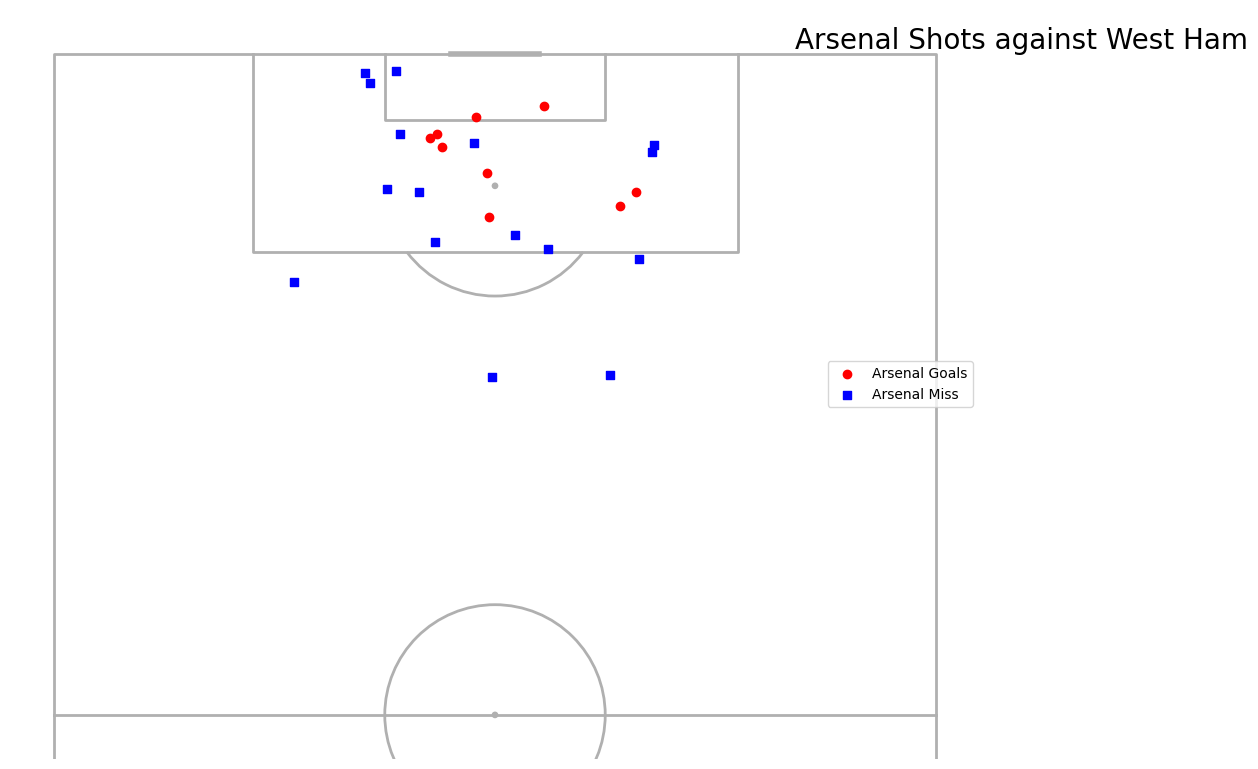

In [11]:
pitch = VerticalPitch(half= True)
fig, ax = pitch.draw(figsize=(10,8))
#ARSENAL
                   #SIZE: s=shots_arsenal['shot_statsbomb_xg']*100+100, 
                   #COLOURMAP: cmap='RdYlGn', c=shots_arsenal['shot_statsbomb_xg']
sc = pitch.scatter(shots_arsenal_goal['start_loc_x'], shots_arsenal_goal['start_loc_y'], 
                   c= 'red',
                   ax=ax,
                  label= 'Arsenal Goals')
sc = pitch.scatter(shots_arsenal_miss['start_loc_x'], shots_arsenal_miss['start_loc_y'], 
                   c= 'blue', marker = 's',
                   ax=ax,
                  label= 'Arsenal Miss')
fig.text(00.8,0.92, 'Arsenal Shots against West Ham', size = 20, ha = 'left')         
ax.legend()


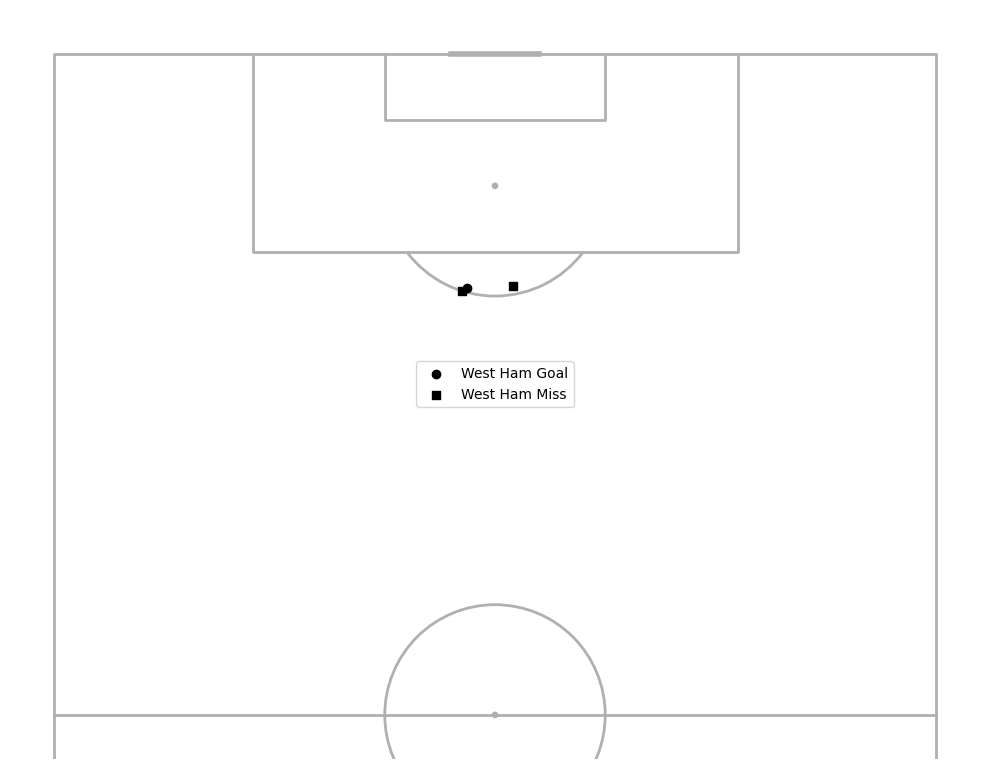

In [9]:
pitch = VerticalPitch(half= True)
fig, ax = pitch.draw(figsize=(10,8))
#WESTHAM
sc = pitch.scatter(shots_westham_goal['start_loc_x'], shots_westham_goal['start_loc_y'], 
                   c= 'black',
                   ax=ax,
                  label = 'West Ham Goal')     
sc = pitch.scatter(shots_westham_miss['start_loc_x'], shots_westham_miss['start_loc_y'], 
                   c = 'black', marker = 's',
                   ax=ax,
                  label = 'West Ham Miss')            
ax.legend()


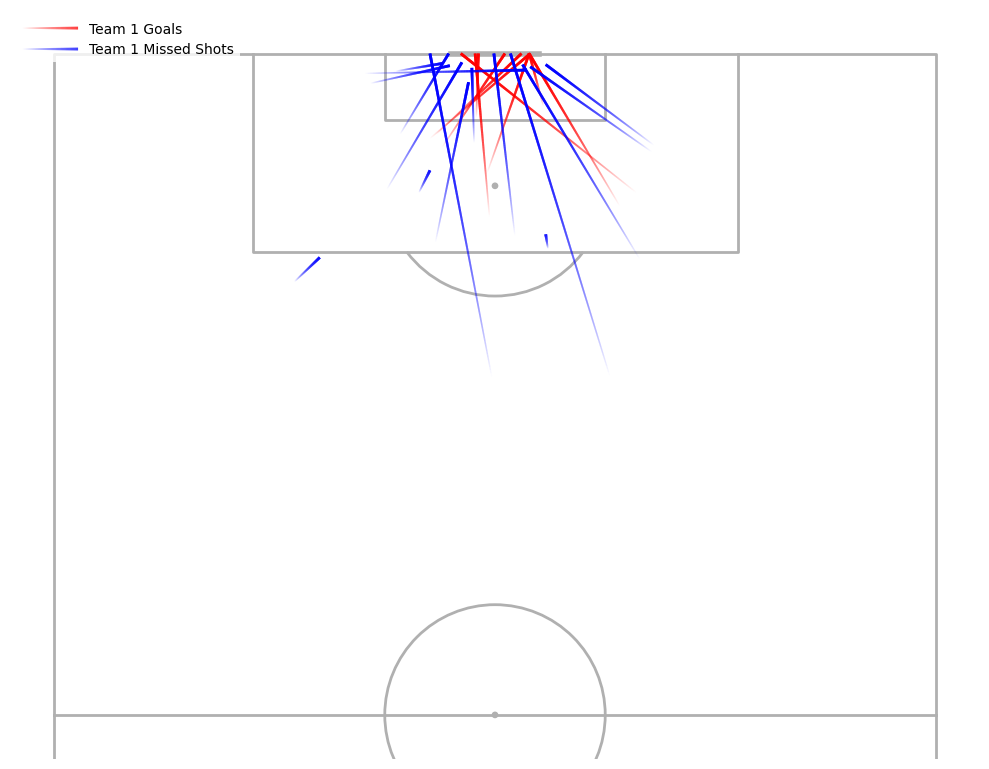

In [36]:
pitch = VerticalPitch(half= True)
fig, ax = pitch.draw(figsize=(10,8))

# Plot the completed passes
lc1 = pitch.lines(shots_arsenal_goal['start_loc_x'], shots_arsenal_goal['start_loc_y'],
                  shots_arsenal_goal['end_loc_x'], shots_arsenal_goal['end_loc_y'],
                  lw=2, transparent=True, comet=True, label='Team 1 Goals',
                  color='red', ax=ax)

# Plot the other passes
lc2 = pitch.lines(shots_arsenal_miss['start_loc_x'], shots_arsenal_miss['start_loc_y'],
                  shots_arsenal_miss['end_loc_x'], shots_arsenal_miss['end_loc_y'],
                  lw=2, transparent=True, comet=True, label='Team 1 Missed Shots',
                  color='blue', ax=ax)
# Plot the legend
ax.legend(edgecolor='None', fontsize=10, loc='upper left', handlelength=4)

# Set the title
#ax_title = ax.set_title(f'{team1} shots vs {team2}', fontsize=30)


In [51]:
#k means clusters
shots_arsenal_goal['distance'] = np.sqrt(((shots_arsenal_goal['end_loc_x'])-(shots_arsenal_goal['start_loc_x']))**2 + ((shots_arsenal_goal['end_loc_y'])-(shots_arsenal_goal['start_loc_y']))**2)
#print(shots_arsenal_goal)

X = shots_arsenal_goal[['start_loc_x', 'end_loc_x','start_loc_y', 'end_loc_y','distance']]
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)


In [60]:
#in this match, arsenal score 9 goals, can't do more than 9 clusters!!

km = KMeans(n_clusters=3)
km = km.fit(X_scaled)
km.inertia_/len(shots_arsenal_goal)

1.2554280574698276

In [63]:
clusters = km.fit_predict(X_scaled)
shots_arsenal_goal['clusters'] = clusters

In [64]:
shots_arsenal_goal = shots_arsenal_goal.sample(frac=1)

ValueError: Length mismatch: Expected axis has 4 elements, new values have 9 elements

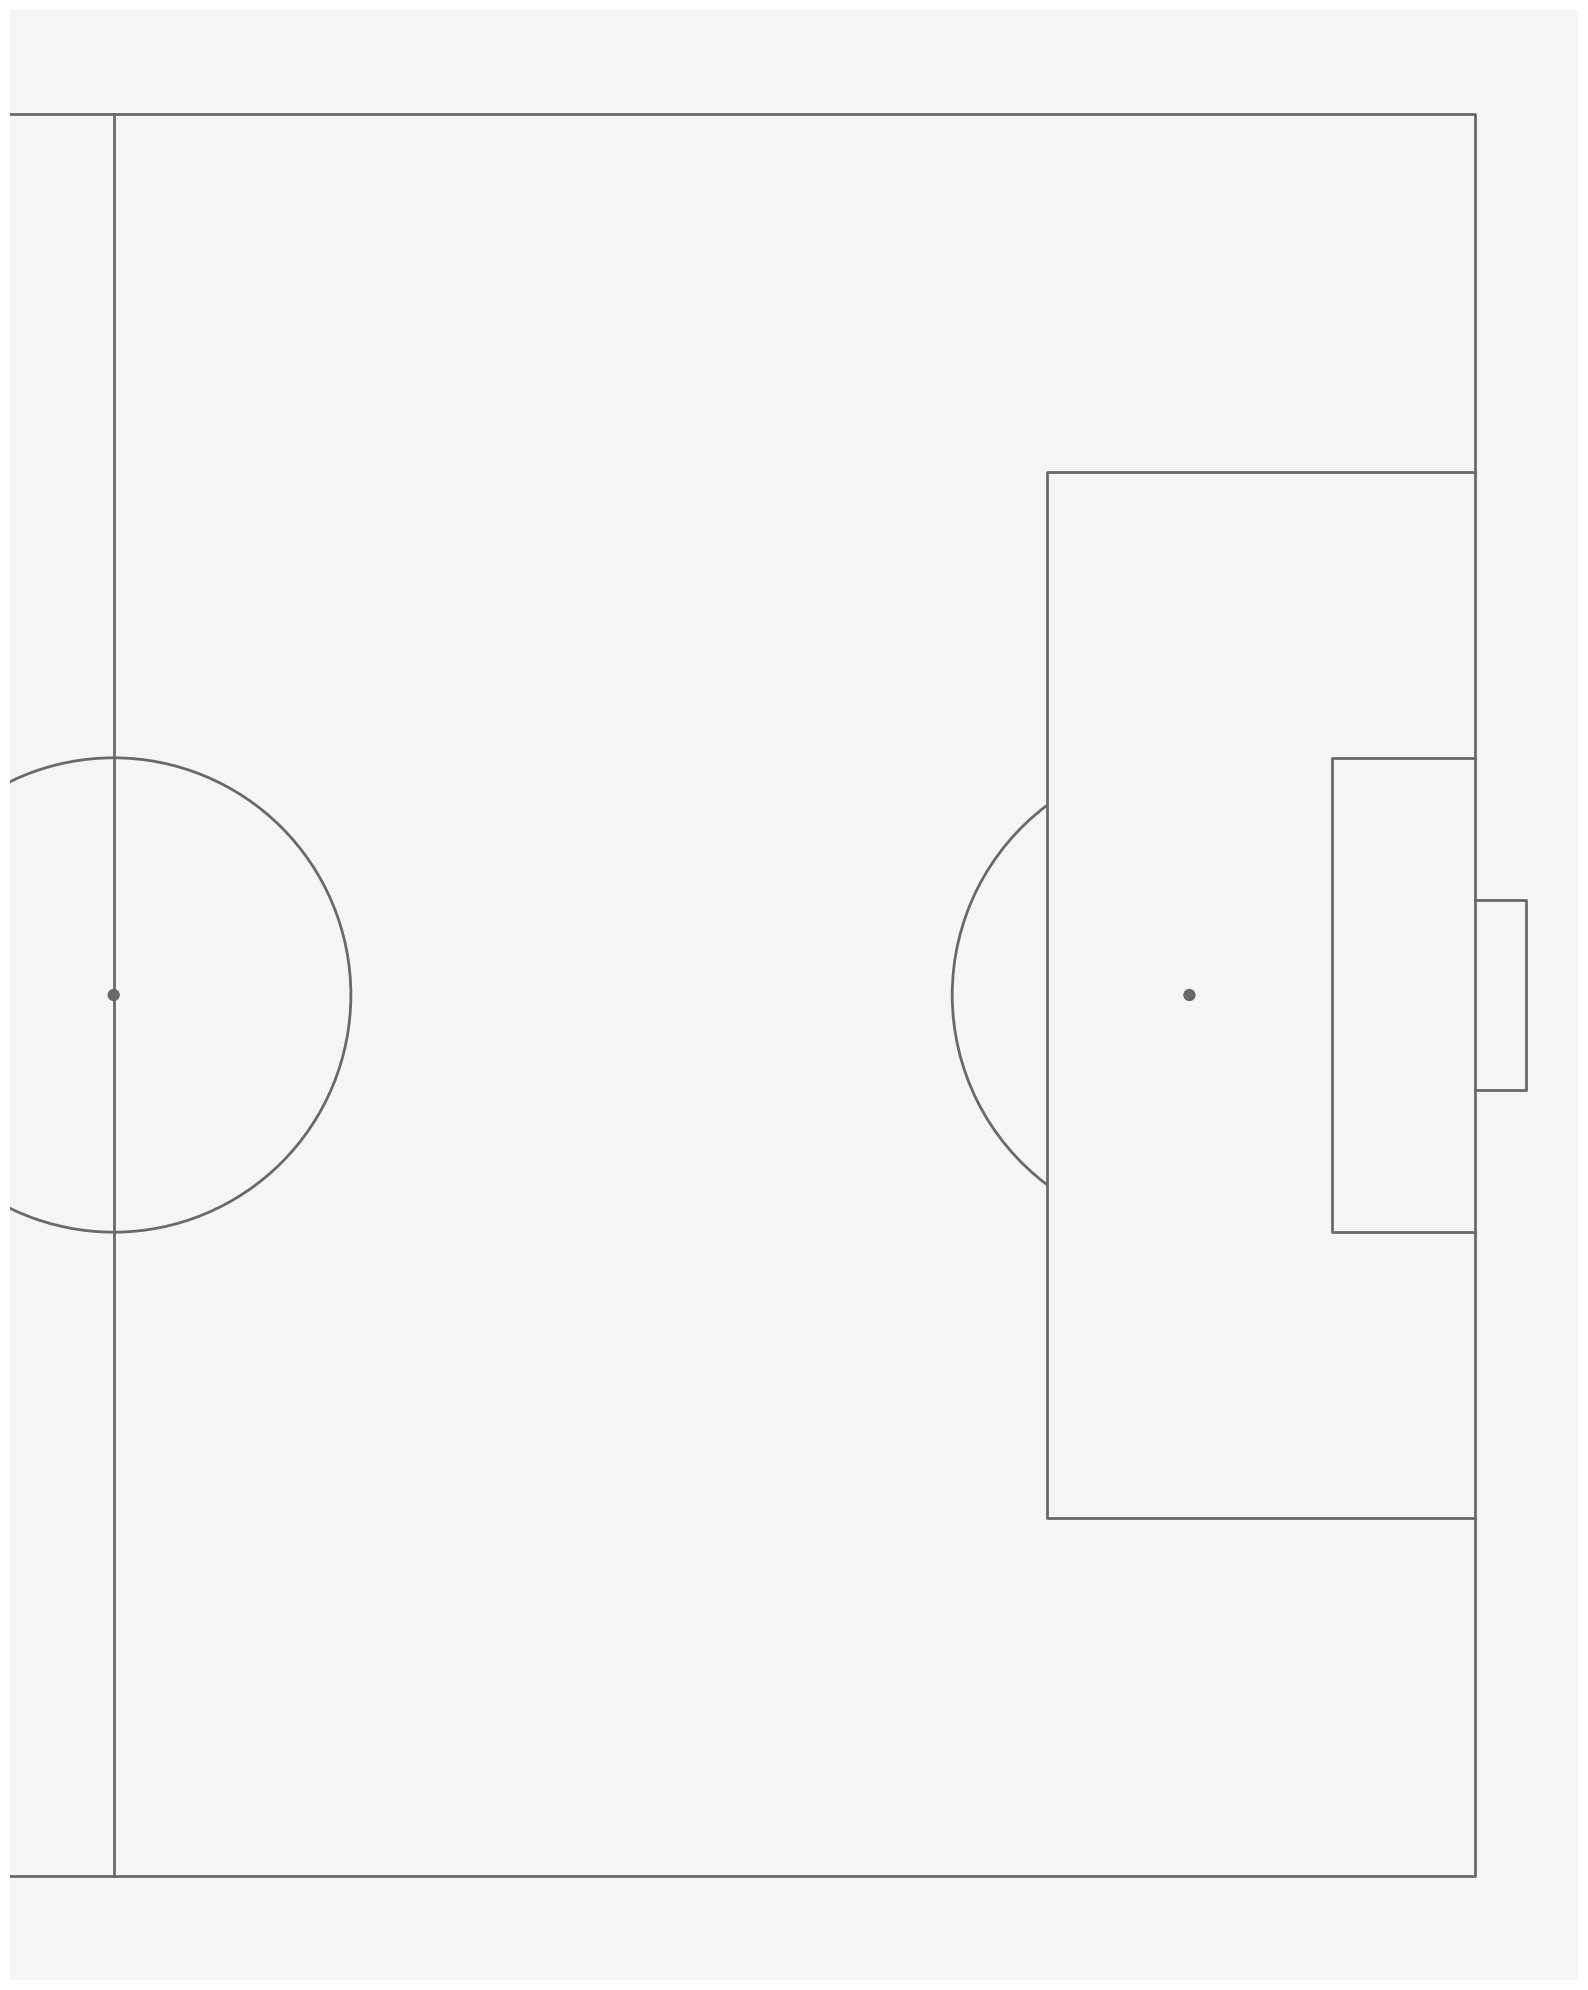

In [69]:
pitch = Pitch(pitch_type='custom',half=True, goal_type='box', pitch_color='#f5f5f5', line_color='#696969' ,linewidth=2,pitch_length=105, pitch_width=68)
fig, axs = pitch.draw(figsize=(20,20))

cluster_analysis = shots_arsenal_goal.loc[shots_arsenal_goal['clusters']==(5*i + j)][:9]
cluster_analysis.index = np.arange(0,9,1)
axs[i,j].invert_yaxis()
for k in range(len(cluster_analysis)):
        axs[i,j].plot([cluster_analysis['start_loc_x'][k],cluster_analysis['end_loc_x'][k]],[cluster_analysis['start_loc_y'][k],cluster_analysis['end_loc_y'][k]], color='blue')

sns.scatterplot(data=cluster_analysis,x='start_loc_x',y='start_loc_y',color='blue',ax=axs[i,j])
axs[i,j].set_title(str((5*i+j)))
plt.savefig('pass_clusters.png')